In [74]:

import lsst.afw.display  as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')
import matplotlib.pyplot as plt
from astropy.wcs import WCS

In [75]:
from lsst.daf.butler import Butler
repo="/repo/main"
butler = Butler(repo)
registry = butler.registry
all_collections= [c for c in sorted(registry.queryCollections())]
refs=sorted(registry.queryDatasets("", 
                                   collections=all_collections,
                                  ))

In [83]:
our_collection='HSC/runs/RC2/w_2023_32/DM-40356'
our_collection2='u/pferguso/my-first-stars'

In [94]:
refs=sorted(registry.queryDatasets("injected_deepCoadd", 
                                   collections=our_collection2,
                                  ))

In [95]:
refs[0]

DatasetRef(DatasetType('injected_deepCoadd', {band, skymap, tract, patch}, ExposureF), {band: 'i', skymap: 'hsc_rings_v1', tract: 9615, patch: 3}, run='u/pferguso/my-first-stars/20230914T171326Z', id=1c796e6a-5b06-4aea-882b-58ffdb993fbf)

In [73]:
refs[3]

DatasetRef(DatasetType('deepCoadd', {band, skymap, tract, patch}, ExposureF), {band: 'r', skymap: 'hsc_rings_v1', tract: 9615, patch: 3}, run='HSC/runs/RC2/w_2023_32/DM-40356/20230819T003257Z', id=25c2886c-344f-46a2-a80c-c461ceda6b7a)

In [96]:
injected_bot=butler.get(refs[0])

In [25]:
bot

FITS standard SkyWcs:
Sky Origin: (216.2962962963, +0.7438016529)
Pixel Origin: (17999, 17999)
Pixel Scale: 0.168 arcsec/pixel

In [27]:
4000 * 0.168 /60/60

0.18666666666666665

In [30]:
bot.image

lsst.afw.image._image.ImageF=[[-0.07011507 -0.06287428  0.02820485 ... -0.00524999 -0.01249941
   0.00989063]
 [-0.01924159  0.04898769 -0.02180851 ...  0.03267152  0.01876356
  -0.00496439]
 [ 0.0387779  -0.01913358 -0.02164831 ... -0.07963008 -0.01578839
   0.04523275]
 ...
 [-0.00571122  0.07669633  0.01157453 ... -0.04640584 -0.01801034
   0.03416945]
 [-0.01761487 -0.02221878 -0.09470801 ...  0.05076304  0.06006305
   0.02855236]
 [-0.07994083 -0.03076442 -0.0307037  ...  0.10294188  0.08153483
   0.00603276]], bbox=(minimum=(11900, 0), maximum=(16099, 4099))

In [109]:
from astropy.visualization import imshow_norm, MinMaxInterval, SqrtStretch

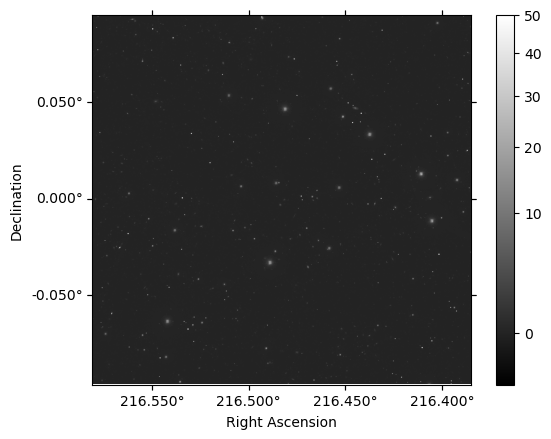

In [122]:
calexp=bot
fig = plt.figure()
ax = plt.subplot(projection=WCS(calexp.getWcs().getFitsMetadata()))
calexp_extent = (calexp.getBBox().beginX, calexp.getBBox().endX,
                 calexp.getBBox().beginY, calexp.getBBox().endY)

im,norm = imshow_norm(calexp.image.array,ax=ax, cmap='gray', vmin=-1, vmax=50,
                extent=calexp_extent, origin='lower', stretch=SqrtStretch())
#ax.grid(color='white', ls='solid')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.coords[0].set_major_formatter('d.ddd')
ax.coords[1].set_major_formatter('d.ddd')
plt.colorbar(im)

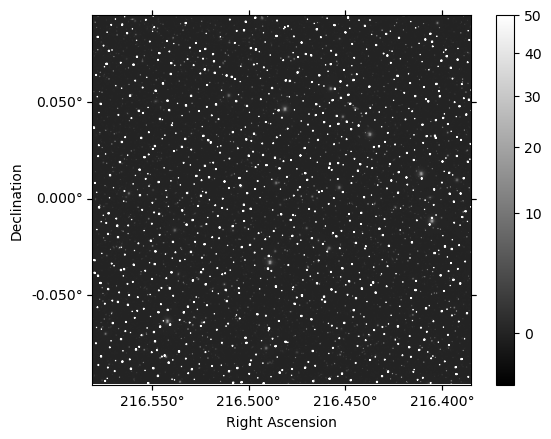

In [123]:
calexp=injected_bot
fig = plt.figure()
ax = plt.subplot(projection=WCS(calexp.getWcs().getFitsMetadata()))
calexp_extent = (calexp.getBBox().beginX, calexp.getBBox().endX,
                 calexp.getBBox().beginY, calexp.getBBox().endY)

im,norm = imshow_norm(calexp.image.array,ax=ax, cmap='gray', vmin=-1, vmax=50,
                extent=calexp_extent, origin='lower', stretch=SqrtStretch())
#ax.grid(color='white', ls='solid')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.coords[0].set_major_formatter('d.ddd')
ax.coords[1].set_major_formatter('d.ddd')
plt.colorbar(im)

In [54]:
im.origin

'lower'

In [52]:
(14 +25/60 +50/3600)/24 * 360

216.45833333333334

In [43]:
calexp_extent

(11900, 16100, 0, 4100)

In [65]:
calexp.getBBox().beginX

11900

In [67]:
calexp.wcs.pixelToSkyArray([11900, 16100],[ 0.0, 4100])

(array([3.78004952, 3.77662914]), array([-0.00167709,  0.00166171]))

In [69]:
import numpy as np

In [71]:
np.degrees(np.array([3.78004952, 3.77662914]))

array([216.58088385, 216.38491051])

In [72]:
np.degrees(np.array([-0.00167709,  0.00166171]))

array([-0.09609018,  0.09520897])

In [46]:
WCS(calexp.getWcs().getFitsMetadata())

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 216.29629629629628  0.7438016528925698  
CRPIX : 18000.0  18000.0  
CD1_1 CD1_2  : -4.6666666666662e-05  0.0  
CD2_1 CD2_2  : 0.0  4.66666666666622e-05  
NAXIS : 0  0